In [1]:
# import libraries
import pandas as pd
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy import text

from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')

from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
import multiprocessing

In [2]:
# if using Google Colab, connect to Google Drive to import the dataset (dataset needs to be saved to Google Drive)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in the data from the SQLite database in the repository

#Read data and create dataframe

#filtered_df = pd.read_csv("Resources/filtered_df.csv")
#filtered_df

# Create a SQLite database engine
#engine = create_engine('sqlite:///filtered_df.sqlite')

# reflect an existing database into a new model
##Base=automap_base()

# reflect the tables
#Base.prepare(autoload_with=engine)

# Write DataFrame to SQLite database
#filtered_df.to_sql('realtor_filtered', con=engine, if_exists='replace', index=False)

# Confirm the data has been written by querying the database
#query = "SELECT * FROM realtor_filtered;"  # Example query
#with engine.connect() as conn:
    #result = conn.execute(text(query))

In [4]:
# Run only if running the cell above

#df = result
#df = pd.DataFrame(df)
#df

In [5]:
# read the dataset into a pandas dataframe
df = pd.read_csv('drive/My Drive/clean_realestate_data.csv')

In [6]:
# reorder the columns
df = df[['bed', 'bath', 'acre_lot','zip_code','house_size', 'price']]
df

,bed,bath,acre_lot,zip_code,house_size,price
0,3.0,3.0,0.45,1001.0,2314.0,525000.0
1,3.0,2.0,0.36,1001.0,1276.0,289900.0
2,3.0,2.0,0.46,1001.0,1476.0,384900.0
3,3.0,2.0,1.76,1001.0,1968.0,199999.0
4,4.0,2.0,2.00,1002.0,1607.0,419000.0
...,...,...,...,...,...,...
1086258,4.0,2.0,0.33,99354.0,3600.0,359900.0
1086259,3.0,2.0,0.10,99354.0,1616.0,350000.0
1086260,6.0,3.0,0.50,99354.0,3200.0,440000.0
1086261,2.0,1.0,0.09,99354.0,933.0,179900.0


In [7]:
# remove the extreme outliers from the dataset
df=df[(df['price'] < 1200000) & (df['bed'] < 6) & (df['bath'] < 6) & (df['acre_lot'] < 0.5) & (df['house_size'] < 4000)]
df

,bed,bath,acre_lot,zip_code,house_size,price
0,3.0,3.0,0.45,1001.0,2314.0,525000.0
1,3.0,2.0,0.36,1001.0,1276.0,289900.0
2,3.0,2.0,0.46,1001.0,1476.0,384900.0
8,3.0,2.0,0.16,1002.0,1280.0,275000.0
9,4.0,2.0,0.49,1002.0,1814.0,415000.0
...,...,...,...,...,...,...
1086257,4.0,2.0,0.20,99354.0,2780.0,339900.0
1086258,4.0,2.0,0.33,99354.0,3600.0,359900.0
1086259,3.0,2.0,0.10,99354.0,1616.0,350000.0
1086261,2.0,1.0,0.09,99354.0,933.0,179900.0


In [8]:
# Set the features and the target
X = df.iloc[:,0:5]
y = df.iloc[:,5]

In [17]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
# define the model and its parameters
model = XGBRegressor(n_estimators=5000, max_depth=8, eta=0.1, subsample=1, colsample_bytree=1)

In [19]:
# fit the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eta=0.1, eval_metric=None, feature_types=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, ...)

In [20]:
# make predictions
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

testing_data_prediction = model.predict(X_test)

[265989.62 528254.   304608.4  ... 167951.67 276655.1  311726.53]


In [21]:
# Evaluate the model

# R Squared Error
r2_train = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)

# Mean Squared Error
mse_train = mean_squared_error(y_train, training_data_prediction)

print('R2 train:', r2_train)
print('Mean Absolute Error train:', mae_train)
print('Mean Squared Error train:', mse_train)

# R Squared Error
r2_test = metrics.r2_score(y_test, testing_data_prediction)

# Mean Absolute Error
mae_test = metrics.mean_absolute_error(y_test, testing_data_prediction)

# Mean Squared Error
mse_test = mean_squared_error(y_test, testing_data_prediction)

print('R2 test:', r2_test)
print('Mean Absolute Error test:', mae_test)
print('Mean Squared Error test:', mse_test)

R2 train: 0.8899189846101204
Mean Absolute Error train: 53221.014064581934
Mean Squared Error train: 5855348972.44068
R2 test: 0.7355240073746382
Mean Absolute Error test: 80730.29677508383
Mean Squared Error test: 14020249115.840431


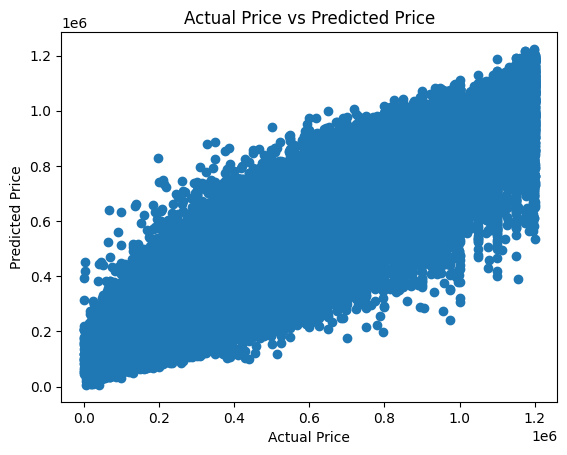

In [22]:
# plot the predictions vs. the actual prices
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

TRIALS BEFORE REMOVING EXTREME OUTLIERS

------

model = XGBRegressor()

train size: 0.9

R2 train: 0.6347886037895583

Mean Absolute Error train: 174051.72224413152

R2 test: 0.5981781814380966

Mean Absolute Error test: 181824.63278297667

------

model = XGBRegressor(n_estimators=3000, max_depth=7, eta=0.05, subsample=1, colsample_bytree=1)

train size: 0.9

R2 train: 0.7718108651541066

Mean Absolute Error train: 145669.83489682685

R2 test: 0.558076852055688

Mean Absolute Error test: 172306.28461587365

-------

model = XGBRegressor(n_estimators=3000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train size: 0.6

R2 train: 0.755125968580026

Mean Absolute Error train: 136562.60471984887

R2 test: 0.529123296680929

Mean Absolute Error test: 179155.43323051388

TRIALS AFTER REMOVING EXTREME OUTLIERS

------

model = XGBRegressor(n_estimators=50, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.6906604442183394

Mean Absolute Error train: 90716.13827453465

R2 test: 0.6894951215217453

Mean Absolute Error test: 90815.03917121617

------

model = XGBRegressor(n_estimators=100, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7140651402541213

Mean Absolute Error train: 86684.1823547829

R2 test: 0.7117631573623067

Mean Absolute Error test: 86902.04578267818

------

model = XGBRegressor(n_estimators=200, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7314246269400434

Mean Absolute Error train: 83596.70744187974

R2 test: 0.7266726024986951

Mean Absolute Error test: 84142.24306529127

------

model = XGBRegressor(n_estimators=300, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7395200517364702

Mean Absolute Error train: 82138.54576569702

R2 test: 0.7324172709242128

Mean Absolute Error test: 83004.94551158167

------

model = XGBRegressor(n_estimators=400, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7451471426328509

Mean Absolute Error train: 81160.77775149688

R2 test: 0.7359011174173968

Mean Absolute Error test: 82321.1195001977

------

model = XGBRegressor(n_estimators=500, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7488389248838743

Mean Absolute Error train: 80527.56315843915

R2 test: 0.7376360689122947

Mean Absolute Error test: 81961.53319702494

------

model = XGBRegressor(n_estimators=600, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7522888655751445

Mean Absolute Error train: 79952.40409629972

R2 test: 0.739236754375568

Mean Absolute Error test: 81646.16518782651

------

model = XGBRegressor(n_estimators=700, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7552693809387594

Mean Absolute Error train: 79462.89366539322

R2 test: 0.7404449638075141

Mean Absolute Error test: 81409.9830104525

------

model = XGBRegressor(n_estimators=800, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7579399939325597

Mean Absolute Error train: 79021.76961829345

R2 test: 0.741345433301847

Mean Absolute Error test: 81223.02733365682

------

model = XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7621011486482361

Mean Absolute Error train: 78347.33636450993

R2 test: 0.7423827204405429

Mean Absolute Error test: 80997.67638125172

------

model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7790220790972215

Mean Absolute Error train: 75606.30354847055

R2 test: 0.7447849784761487

Mean Absolute Error test: 80426.13799424411

------

model = XGBRegressor(n_estimators=1000, max_depth=8, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8005316061768725

Mean Absolute Error train: 71992.37829285812

R2 test: 0.7461740984564156

Mean Absolute Error test: 80019.96260581595

------

model = XGBRegressor(n_estimators=1000, max_depth=9, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8267204267811712

Mean Absolute Error train: 67279.33382461574

R2 test: 0.7447197825953751

Mean Absolute Error test: 80076.31844804753

------

model = XGBRegressor(n_estimators=1200, max_depth=8, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.807665199395981

Mean Absolute Error train: 70765.14017572902

R2 test: 0.7458138196082119

Mean Absolute Error test: 80021.26810897503

------

model = XGBRegressor(n_estimators=1200, max_depth=9, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8357884078698086

Mean Absolute Error train: 65549.366642405

R2 test: 0.7434135247238085

Mean Absolute Error test: 80205.58431944887

------

model = XGBRegressor(n_estimators=1200, max_depth=9, eta=0.05, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8055323040505296

Mean Absolute Error train: 71118.67897373532

R2 test: 0.7475791901861315

Mean Absolute Error test: 79772.63605277674

------

model = XGBRegressor(n_estimators=1200, max_depth=9, eta=0.01, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.7580298374801726

Mean Absolute Error train: 79142.41345299191

R2 test: 0.740091370017519

Mean Absolute Error test: 81530.94456905527

------

model = XGBRegressor(n_estimators=1200, max_depth=9, eta=0.07, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8195157718035249

Mean Absolute Error train: 68626.72121910266

R2 test: 0.7465808142533559

Mean Absolute Error test: 79815.64140113165

------

model = XGBRegressor(n_estimators=2000, max_depth=9, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8617366965509309

Mean Absolute Error train: 60252.49284608319

R2 test: 0.7378241049632338

Mean Absolute Error test: 80841.25702115051

------

model = XGBRegressor(n_estimators=2000, max_depth=8, eta=0.1, subsample=0.8, colsample_bytree=0.8)

train_size: 0.6

R2 train: 0.8286951464324155

Mean Absolute Error train: 66935.12338848294

R2 test: 0.7432064731098904

Mean Absolute Error test: 80288.57908269313

------

model = XGBRegressor(n_estimators=2000, max_depth=8, eta=0.1, subsample=1, colsample_bytree=1)

train_size: 0.6

R2 train: 0.8392837660391608

Mean Absolute Error train: 64615.112943452245

R2 test: 0.7445206269077846

Mean Absolute Error test: 79877.17483334464

------

model = XGBRegressor(n_estimators=3000, max_depth=8, eta=0.1, subsample=1, colsample_bytree=1)

train_size: 0.6

R2 train: 0.8609647042906534

Mean Absolute Error train: 60027.96599821589

R2 test: 0.741772219885853

Mean Absolute Error test: 80101.91220141356

------

model = XGBRegressor(n_estimators=5000, max_depth=8, eta=0.1, subsample=1, colsample_bytree=1)

train_size: 0.6

R2 train: 0.8899189846101204

Mean Absolute Error train: 53221.014064581934

R2 test: 0.7355240073746382

Mean Absolute Error test: 80730.29677508383

------

model = XGBRegressor(n_estimators=5000, max_depth=8, eta=0.1, subsample=1, colsample_bytree=1)

train_size: 0.8

R2 train: 0.874140597110503

Mean Absolute Error train: 56921.03034437302

R2 test: 0.7443038521482901

Mean Absolute Error test: 79263.1132019768

------

